<a href="https://colab.research.google.com/github/josmyrose/Unsupervised-Learning/blob/main/case_study_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Read the dataset to the python environment.


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/kmeans/Wine.csv')

In [ ]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**PREPROCESSING**

In [ ]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
dataf=norm.fit_transform(data)

In [ ]:
dataf.head()

AttributeError: ignored

In [ ]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [ ]:
#To know the count of data on the dataset
data.shape

(178, 13)

Try out different clustering models in the wine dataset.
**bold text**KMEANS CLUSTERING

0.5893776280459065
0.21097561296654627
0.10306150549665624
0.05910073413010722
0.03969232820057103
0.031232108968648236
0.027180954089528406
0.023664665162120284
0.020448724450857585
0.01853787449801328


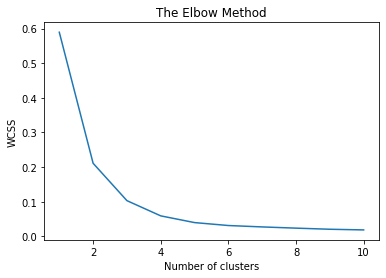

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): #kmeans++ for selecting the centroids
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) #instance is created
  #randomstate=42 to ensure that same dataset is used.
  kmeans.fit(dataf)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_) 
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
  

Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42) #instance is created
  #randomstate=42 to ensure that same dataset is used.
ykmeans=kmeans.fit_predict(dataf)
X=np.array(dataf)# Need to convert into array
type(X)

numpy.ndarray

In [ ]:
labels=kmeans.predict(dataf)
print(labels)

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1
 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 3 1 3 0 1 1 1 1 3 2 3 3 1
 2 3 3 3 3 3 0 1 1 1 3 3 3 1 1 2 1 3 1 0 0 1 3 3 1 3 1 1 3 3 1 0 1 3 0 1 3
 0 1 3 3 3 3 0 3 1 1 0 0 3 3 3 0 3 0 1 3 3 3 3 1 1 1 3 1 1 1 2 3 1 1 1 3 1
 1 3 0 3 0 1 1 1 3 2 1 1 1 1 3 1 1 1 1 1 1 3 3 3 1 1 1 1 1 3]


In [ ]:
df=pd.DataFrame({'labels':ykmeans,'species':dataf["Alcohol"]})

IndexError: ignored

In [ ]:
ykmeans
X=np.array(ykmeans)# Need to convert into array
type(X)
X

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2], dtype=int32)

In [ ]:
X

array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2], dtype=int32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.**Agglomerative**

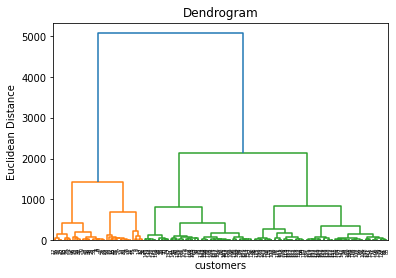

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean' ,linkage='ward')
yhc=hc.fit_predict(data)

In [ ]:
yhc=np.array(yhc)
yhc

array([3, 3, 3, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 3, 0, 0, 3, 1, 0, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 0, 4, 4, 0,
       2, 2, 0, 0, 0, 4, 2, 3, 0, 4, 4, 2, 0, 2, 4, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 4, 4, 3, 0, 4, 0, 4, 0, 2, 4, 4, 0, 4, 2, 2, 4, 0,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 0, 2, 4, 4, 4, 4, 4, 2, 4, 2, 0, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 4, 0, 0, 2, 2, 2, 4, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])